## How to plot millions of data with datashader+plotly
- https://moderndata.plot.ly/visualize-100-million-points-with-datashader-and-plotly/
- http://www.filipyoo.com/plot-visualization-Hadoop-large-dataset-with-python-datashader/

small data with plotly

In [1]:
import plotly.graph_objs as go
import plotly.plotly as py
# Create random data with numpy
import numpy as np

random_x=np.random.rand(1000)

random_y=random_x**2+np.random.rand(1000)
# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)
data = [trace]
py.iplot(data, filename='basic-scatter')

what's difference with big data

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict
import plotly.plotly as py

In [5]:

n = 100000000
 
np.random.seed(2)                       
cols = ['Signal']                    # Column name of signal
start = 1456297053                   # Start time
end = start + n                      # End time   
 
# Generate a fake signal
time = np.linspace(start, end, n)
signal = np.random.normal(0, 0.3, size=n).cumsum() + 50
 
# Generate many noisy samples from the signal
noise = lambda var, bias, n: np.random.normal(bias, var, n)
data = {c: signal + noise(1, 10*(np.random.random() - 0.5), n) for c in cols}
 
# Pick a few samples and really blow them out
locs = np.random.choice(n, 10)
data['Signal'][locs] *= 2
 
# Default plot ranges:
x_range = (start, end)
y_range = (1.2*signal.min(), 1.2*signal.max())
 
print("x_range: {0} y_range: {1}".format(x_range, y_range))
 
# Create a dataframe
data['Time'] = np.linspace(start, end, n)
df = pd.DataFrame(data)
df.head()

x_range: (1456297053, 1556297053) y_range: (-1084.805811445885, 4590.981793023145)


,Signal,Time
0,48.139002,1.456297e+09
1,46.913121,1.456297e+09
2,47.818411,1.456297e+09
3,46.240668,1.456297e+09
4,47.332595,1.456297e+09


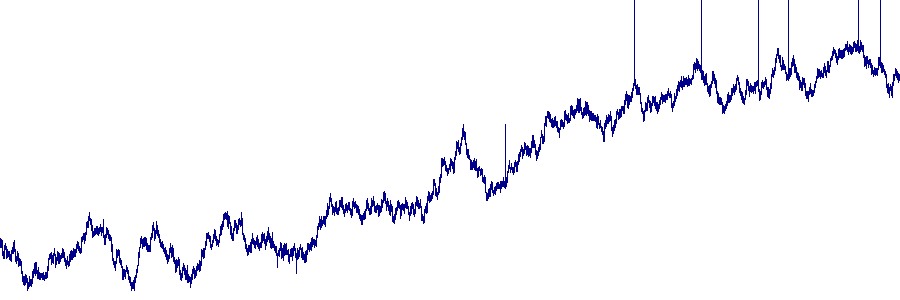

In [6]:
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=300, plot_width=900)
aggs= OrderedDict((c, cvs.line(df, 'Time', c)) for c in cols)
# aggs = cvs.points(df, 'Signal', 'Time') 
img = tf.shade(aggs['Signal'])
 
img

CONVERT THE IMAGE TO AN INTERACTIVE CHART USING PLOTLY

In [7]:
arr = np.array(img)
z = arr.tolist()
 
dims = len(z[0]), len(z)
 
data = [ dict( 
        z = z, 
        x = np.linspace(x_range[0], x_range[1], dims[0]),
        y = np.linspace(y_range[0], y_range[1], dims[1]),
        colorscale = [ [0, 'rgba(255,255,255,0)'], [1, 'rgba(0,0,255,1)'] ],
        showscale = False,
        # reversescale = True,
        type = 'heatmap' ) ]
 
layout = dict(  
    margin = dict( t=0, b=0 ),
    yaxis = dict( 
        fixedrange=True,
    )
)
 
fig = dict( data=data, layout=layout )
 
py.iplot( fig, filename = 'heatmap-time-series' )

## holoviews + datashader

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
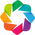

In [4]:
import holoviews as hv, numpy as np
import datashader as ds
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate
hv.notebook_extension("bokeh")

In [6]:
%%output size=150

decimate.max_samples=1000
dynspread.max_px=20
dynspread.threshold=0.5

def random_walk(n, f=500):
    """Random walk in a 2D space, smoothed with a filter of length f"""
    xs = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()
    ys = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()
    xs += 0.1*np.sin(0.1*np.array(range(n-1+f))) # add wobble on x axis
    xs += np.random.normal(0, 0.005, size=n-1+f) # add measurement noise
    ys += np.random.normal(0, 0.005, size=n-1+f)
    return np.column_stack([xs, ys])

def random_cov():
    """Random covariance for use in generating 2D Gaussian distributions"""
    A = np.random.randn(2,2)
    return np.dot(A, A.T)

def time_series(T = 1, N = 100, mu = 0.1, sigma = 0.1, S0 = 20):  
    """Parameterized noisy time series"""
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) # geometric brownian motion
    return S
np.random.seed(1)
points = hv.Points(np.random.multivariate_normal((0,0), [[0.61, 0.8], [0.09, -.33]], (1000000,)),label="Points")
paths = hv.Path([0.15*random_walk(100000) for i in range(10)],label="Paths")
(decimate(points) + datashade(points) + datashade(paths)).cols(1)

D:\Python27\envs\py36\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



:Layout
   .DynamicMap.I   :DynamicMap   []
      :Points   [x,y]
   .DynamicMap.II  :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)
   .DynamicMap.III :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)